In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
df = pd.read_csv('mbti_reddit_1.csv')
pd.set_option('display.max_colwidth', -1)

In [22]:
df.head(n=50)

,flair_text,body,subreddit,author
0,INFP: The Dreamer Senpai,Lol that's why I left.,entp,LadyBanterbury
1,INTP: The Theorist,"I was just about to post ""I try telling people all the time that I'm always joking unless I say 'I am being serious right now' and they still don't catch on!"" But here you've already figured out the secret. It's like you know me.",INTP,Finarin
2,INFP: The Dreamer,My first thought was Pepsi or something. Probably not alcohol.,WTF,xanplease
3,"ENTP: Antisocial Extrovert, Rational Eccentric","Not if the formula is something like ""every time it says 'Do', add 5 bpm"". Then it would be arithmetic.",youtubehaiku,HeirToGallifrey
4,INTP/18/m/blankly staring at you,Does this imply I'm a five now?,entp,lightfive
5,INTP: The Theorist,"Well, I wouldn't know but I think there's a lot of potential to it. If the technology develops in image awareness, we can have cameras that can detect when a child is drowning in a swimming pool, search for victims in a natural calamity, have cars detect other vehicles to prevent car accidents and even more useful stuff.\n\n",InternetIsBeautiful,ElementalVoltage
6,The INFJ Dude,"sine na, support the directors, actors and other people behind the film ;)",Philippines,BabyFlo70
7,Honorary INFP; INTP/21/F,I use just enough vacation days so that I don't lose any when the time rolls over.,tumblr,RockinSocksReborn
8,intp or something of the sort,Can be ur angle... or you're devil ;),woof_irl,crowbird_
9,INTP/23/F,I mean we don't how much influence Crow has on Ruby...,RWBY,RockinSocksReborn


In [23]:
df.columns = ['flair','comments','subreddit','username']
df.head()

,flair,comments,subreddit,username
0,INFP: The Dreamer Senpai,Lol that's why I left.,entp,LadyBanterbury
1,INTP: The Theorist,"I was just about to post ""I try telling people all the time that I'm always joking unless I say 'I am being serious right now' and they still don't catch on!"" But here you've already figured out the secret. It's like you know me.",INTP,Finarin
2,INFP: The Dreamer,My first thought was Pepsi or something. Probably not alcohol.,WTF,xanplease
3,"ENTP: Antisocial Extrovert, Rational Eccentric","Not if the formula is something like ""every time it says 'Do', add 5 bpm"". Then it would be arithmetic.",youtubehaiku,HeirToGallifrey
4,INTP/18/m/blankly staring at you,Does this imply I'm a five now?,entp,lightfive


In [24]:
# check Missing value 
df.isna().sum()

flair        0 
comments     23
subreddit    0 
username     0 
dtype: int64

In [25]:
# drop missing rows 
df = df.dropna()

In [26]:
# check missing value again 
df.isna().sum()

flair        0
comments     0
subreddit    0
username     0
dtype: int64

In [27]:
# create a subset with flair, username and comments
df_comments = df[['flair','comments','username']]

In [28]:
# merge comments based on username and flare 
df2 = df_comments.groupby(['flair', 'username'])['comments'].apply('.'.join).reset_index()


In [29]:
df2.head()

flair             username  \
0  \tINFP:The Mediator  karlmarx6666          
1   ENTP "'lady"        mcflycasual           
2   INFJ 24 M           International_Ninja   
3   INFJ LSD            MirageAsti            
4   INFJ-926            Pensiive              

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

In [30]:
# extract MBTI from flair text 

import re 

mbti = ['INFP','INFJ','INTP','INTJ','ENTP','ENFP','ISTP','ISFP','ENTJ','ISTJ','ENFJ','ISFJ','ESTP','ESFP','ESFJ','ESTJ']
pat = '|'.join(r"\b{}\b".format(x) for x in mbti)

df2['personality'] = df2['flair'].str.findall(pat, flags=re.I).str.join(' ')

In [35]:
# split the personality column 
new = df2['personality'].str.split(' ', n=3, expand=True)
new.columns=['first','second','third','fourth']

In [36]:
new.head()

,first,second,third,fourth
0,INFP,None,None,None
1,ENTP,None,None,None
2,INFJ,None,None,None
3,INFJ,None,None,None
4,INFJ,None,None,None


In [37]:
# after examine the flair text, I decide to keep only the first personality indicator 
df2['MBTI'] = new['first']

In [44]:
# rearrage the column order
df2 = df2[['MBTI', 'flair', 'username','comments']]
df2['MBTI'] = df2['MBTI'].str.upper()

In [45]:
df2.head()

MBTI                flair             username  \
0  INFP  \tINFP:The Mediator  karlmarx6666          
1  ENTP   ENTP "'lady"        mcflycasual           
2  INFJ   INFJ 24 M           International_Ninja   
3  INFJ   INFJ LSD            MirageAsti            
4  INFJ   INFJ-926            Pensiive              

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

In [50]:
# check 
df2['MBTI'].unique()

array(['INFP', 'ENTP', 'INFJ', 'INTJ', 'INTP', 'ISTP', '', 'ISTJ', 'ENFP',
       'ENTJ', 'ESTP', 'ENFJ', 'ISFP', 'ESFJ', 'ESFP', 'ESTJ', 'ISFJ'],
      dtype=object)

In [48]:
df2['MBTI'].value_counts()

INFP    4453
INFJ    3838
INTP    2253
ENTP    1690
INTJ    1171
ENTJ    819 
ENFP    631 
ISTP    417 
ENFJ    410 
ISFJ    163 
ISTJ    153 
ISFP    124 
ESTP    119 
ESFP    50  
ESTJ    48  
ESFJ    37  
        28  
Name: MBTI, dtype: int64

Text(0.5, 1.0, 'Comments Counts by Personality Types')

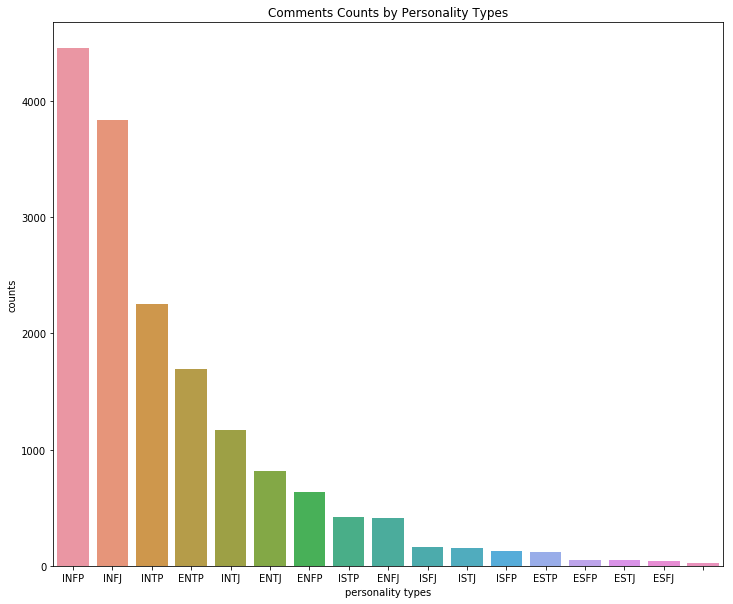

In [46]:
plt.figure(figsize=(12,10))
sns.countplot(data=df2, x='MBTI', order = df2['MBTI'].value_counts().index)
plt.xlabel('personality types')
plt.ylabel('counts')
plt.title('Comments Counts by Personality Types')